# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [4]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularization loss.

In [116]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [118]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09
W2 max relative error: 3.440708e-09
b2 max relative error: 4.447646e-11


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.02.

Final training loss:  0.0007311789655197494


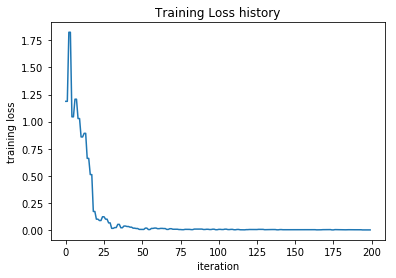

In [126]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False, batch_size=3)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [128]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = '/Users/usmanrizwan/PycharmProjects/CNN/cifar-10-batches-py/'
    
    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [149]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


iteration 0 / 5000: loss 2.303143
iteration 100 / 5000: loss 1.872553
iteration 200 / 5000: loss 1.768982
iteration 300 / 5000: loss 1.865577
iteration 400 / 5000: loss 1.566533
iteration 500 / 5000: loss 1.609292
iteration 600 / 5000: loss 1.624887
iteration 700 / 5000: loss 1.557209
iteration 800 / 5000: loss 1.452477
iteration 900 / 5000: loss 1.620546
iteration 1000 / 5000: loss 1.460337
iteration 1100 / 5000: loss 1.536617
iteration 1200 / 5000: loss 1.529483
iteration 1300 / 5000: loss 1.404146
iteration 1400 / 5000: loss 1.382456
iteration 1500 / 5000: loss 1.632074
iteration 1600 / 5000: loss 1.484860
iteration 1700 / 5000: loss 1.323009
iteration 1800 / 5000: loss 1.459890
iteration 1900 / 5000: loss 1.502165
iteration 2000 / 5000: loss 1.329642
iteration 2100 / 5000: loss 1.451355
iteration 2200 / 5000: loss 1.419569
iteration 2300 / 5000: loss 1.434965
iteration 2400 / 5000: loss 1.471535
iteration 2500 / 5000: loss 1.401847
iteration 2600 / 5000: loss 1.477148
iteration 270

# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

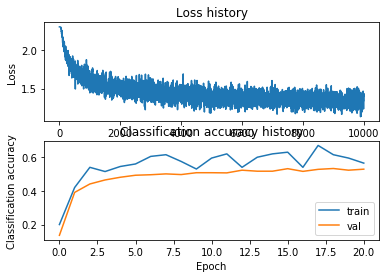

In [150]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

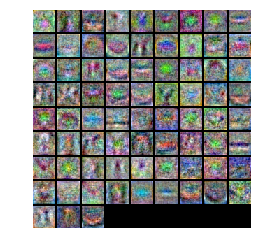

In [151]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can (52% could serve as a reference), with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

**Explain your hyperparameter tuning process below.**

$\color{blue}{\textit Your Answer:}$ The validation set was used to tune the hyperparameters (hidden size, learning rate, learning rate decay and regularization). Once the best heperparameters combinatiomn, the neural network was retrained with these hyperparameters for 5000 iterations. The final accuracy achieved on the validation set was 52.7

In [147]:
hyper_params = {'hidden_size': [10, 25, 50, 75], 
               'learning_rate': [1e-4, 1e-3], 'learning_rate_decay':[0.75, 0.8, 0.9, 0.95], 
               'reg': [0.25,0.5, 0.75]}

best_val_acc = 0
best_val_hp = None

for hs in hyper_params['hidden_size']:
    for lr in hyper_params['learning_rate']:
        for lrd in hyper_params['learning_rate_decay']:
            for r in hyper_params['reg']:
                net = TwoLayerNet(input_size, hs, num_classes)
                # Train the network
                stats = net.train(X_train, y_train, X_val, y_val,
                            num_iters=1500, batch_size=200,
                            learning_rate=lr, learning_rate_decay=lrd,
                            reg=r, verbose=True)
                
                # Predict on the validation set
                val_acc = (net.predict(X_val) == y_val).mean()
                print('Validation accuracy: ', val_acc)
                
                if val_acc > best_val_acc:
                    best_val_acc = val_acc
                    best_val_hp = [hs, lr, lrd, r]
                

iteration 0 / 1500: loss 2.302666
iteration 100 / 1500: loss 2.302629
iteration 200 / 1500: loss 2.302394
iteration 300 / 1500: loss 2.300207
iteration 400 / 1500: loss 2.295002
iteration 500 / 1500: loss 2.283954
iteration 600 / 1500: loss 2.249065
iteration 700 / 1500: loss 2.230408
iteration 800 / 1500: loss 2.201355
iteration 900 / 1500: loss 2.182012
iteration 1000 / 1500: loss 2.128964
iteration 1100 / 1500: loss 2.126234
iteration 1200 / 1500: loss 2.096556
iteration 1300 / 1500: loss 2.131113
iteration 1400 / 1500: loss 2.090778
Validation accuracy:  0.24
iteration 0 / 1500: loss 2.302739
iteration 100 / 1500: loss 2.302669
iteration 200 / 1500: loss 2.302230
iteration 300 / 1500: loss 2.301007
iteration 400 / 1500: loss 2.296903
iteration 500 / 1500: loss 2.266977
iteration 600 / 1500: loss 2.250333
iteration 700 / 1500: loss 2.223372
iteration 800 / 1500: loss 2.193393
iteration 900 / 1500: loss 2.213479
iteration 1000 / 1500: loss 2.108999
iteration 1100 / 1500: loss 2.11448

iteration 600 / 1500: loss 1.843490
iteration 700 / 1500: loss 1.815657
iteration 800 / 1500: loss 1.746558
iteration 900 / 1500: loss 1.717051
iteration 1000 / 1500: loss 1.748274
iteration 1100 / 1500: loss 1.776544
iteration 1200 / 1500: loss 1.701147
iteration 1300 / 1500: loss 1.739534
iteration 1400 / 1500: loss 1.678840
Validation accuracy:  0.404
iteration 0 / 1500: loss 2.302659
iteration 100 / 1500: loss 2.009042
iteration 200 / 1500: loss 1.805765
iteration 300 / 1500: loss 1.758700
iteration 400 / 1500: loss 1.759750
iteration 500 / 1500: loss 1.725936
iteration 600 / 1500: loss 1.725188
iteration 700 / 1500: loss 1.783797
iteration 800 / 1500: loss 1.728075
iteration 900 / 1500: loss 1.766838
iteration 1000 / 1500: loss 1.658631
iteration 1100 / 1500: loss 1.613511
iteration 1200 / 1500: loss 1.705205
iteration 1300 / 1500: loss 1.689330
iteration 1400 / 1500: loss 1.683351
Validation accuracy:  0.416
iteration 0 / 1500: loss 2.302746
iteration 100 / 1500: loss 2.064340
it

iteration 1200 / 1500: loss 2.071010
iteration 1300 / 1500: loss 2.087759
iteration 1400 / 1500: loss 2.036336
Validation accuracy:  0.253
iteration 0 / 1500: loss 2.303162
iteration 100 / 1500: loss 2.303056
iteration 200 / 1500: loss 2.302191
iteration 300 / 1500: loss 2.298251
iteration 400 / 1500: loss 2.277969
iteration 500 / 1500: loss 2.234970
iteration 600 / 1500: loss 2.188340
iteration 700 / 1500: loss 2.112763
iteration 800 / 1500: loss 2.156951
iteration 900 / 1500: loss 2.158468
iteration 1000 / 1500: loss 2.073390
iteration 1100 / 1500: loss 2.108460
iteration 1200 / 1500: loss 2.025213
iteration 1300 / 1500: loss 2.004507
iteration 1400 / 1500: loss 2.095033
Validation accuracy:  0.251
iteration 0 / 1500: loss 2.302772
iteration 100 / 1500: loss 2.302527
iteration 200 / 1500: loss 2.300062
iteration 300 / 1500: loss 2.278400
iteration 400 / 1500: loss 2.212487
iteration 500 / 1500: loss 2.129281
iteration 600 / 1500: loss 2.134635
iteration 700 / 1500: loss 2.014409
iter

iteration 200 / 1500: loss 1.745489
iteration 300 / 1500: loss 1.816207
iteration 400 / 1500: loss 1.609240
iteration 500 / 1500: loss 1.597614
iteration 600 / 1500: loss 1.764310
iteration 700 / 1500: loss 1.686241
iteration 800 / 1500: loss 1.579533
iteration 900 / 1500: loss 1.783181
iteration 1000 / 1500: loss 1.531656
iteration 1100 / 1500: loss 1.501871
iteration 1200 / 1500: loss 1.583555
iteration 1300 / 1500: loss 1.675170
iteration 1400 / 1500: loss 1.578518
Validation accuracy:  0.449
iteration 0 / 1500: loss 2.303165
iteration 100 / 1500: loss 2.020343
iteration 200 / 1500: loss 1.803097
iteration 300 / 1500: loss 1.704100
iteration 400 / 1500: loss 1.719628
iteration 500 / 1500: loss 1.712641
iteration 600 / 1500: loss 1.734660
iteration 700 / 1500: loss 1.736083
iteration 800 / 1500: loss 1.567060
iteration 900 / 1500: loss 1.590636
iteration 1000 / 1500: loss 1.630255
iteration 1100 / 1500: loss 1.528468
iteration 1200 / 1500: loss 1.596146
iteration 1300 / 1500: loss 1.

iteration 800 / 1500: loss 2.019089
iteration 900 / 1500: loss 1.978207
iteration 1000 / 1500: loss 1.898495
iteration 1100 / 1500: loss 2.064955
iteration 1200 / 1500: loss 1.836054
iteration 1300 / 1500: loss 1.909268
iteration 1400 / 1500: loss 1.884573
Validation accuracy:  0.334
iteration 0 / 1500: loss 2.303347
iteration 100 / 1500: loss 2.302922
iteration 200 / 1500: loss 2.299133
iteration 300 / 1500: loss 2.281557
iteration 400 / 1500: loss 2.204286
iteration 500 / 1500: loss 2.180070
iteration 600 / 1500: loss 2.102543
iteration 700 / 1500: loss 2.017380
iteration 800 / 1500: loss 2.041021
iteration 900 / 1500: loss 2.002324
iteration 1000 / 1500: loss 2.020424
iteration 1100 / 1500: loss 1.997197
iteration 1200 / 1500: loss 1.919612
iteration 1300 / 1500: loss 1.960548
iteration 1400 / 1500: loss 1.861266
Validation accuracy:  0.325
iteration 0 / 1500: loss 2.303746
iteration 100 / 1500: loss 2.303224
iteration 200 / 1500: loss 2.299125
iteration 300 / 1500: loss 2.265439
it

iteration 1400 / 1500: loss 1.595380
Validation accuracy:  0.482
iteration 0 / 1500: loss 2.303125
iteration 100 / 1500: loss 2.302653
iteration 200 / 1500: loss 2.299944
iteration 300 / 1500: loss 2.290112
iteration 400 / 1500: loss 2.249017
iteration 500 / 1500: loss 2.179276
iteration 600 / 1500: loss 2.190131
iteration 700 / 1500: loss 2.149762
iteration 800 / 1500: loss 2.173084
iteration 900 / 1500: loss 2.134103
iteration 1000 / 1500: loss 2.111615
iteration 1100 / 1500: loss 2.091161
iteration 1200 / 1500: loss 2.042073
iteration 1300 / 1500: loss 2.080060
iteration 1400 / 1500: loss 2.019351
Validation accuracy:  0.25
iteration 0 / 1500: loss 2.303748
iteration 100 / 1500: loss 2.303427
iteration 200 / 1500: loss 2.302272
iteration 300 / 1500: loss 2.294653
iteration 400 / 1500: loss 2.273260
iteration 500 / 1500: loss 2.212394
iteration 600 / 1500: loss 2.185699
iteration 700 / 1500: loss 2.130166
iteration 800 / 1500: loss 2.086131
iteration 900 / 1500: loss 2.140669
iterati

iteration 400 / 1500: loss 1.793519
iteration 500 / 1500: loss 1.759802
iteration 600 / 1500: loss 1.584014
iteration 700 / 1500: loss 1.653768
iteration 800 / 1500: loss 1.749880
iteration 900 / 1500: loss 1.762267
iteration 1000 / 1500: loss 1.617707
iteration 1100 / 1500: loss 1.520918
iteration 1200 / 1500: loss 1.710513
iteration 1300 / 1500: loss 1.686206
iteration 1400 / 1500: loss 1.662481
Validation accuracy:  0.474
iteration 0 / 1500: loss 2.303165
iteration 100 / 1500: loss 1.956667
iteration 200 / 1500: loss 1.819720
iteration 300 / 1500: loss 1.601951
iteration 400 / 1500: loss 1.605162
iteration 500 / 1500: loss 1.716858
iteration 600 / 1500: loss 1.586906
iteration 700 / 1500: loss 1.543384
iteration 800 / 1500: loss 1.527154
iteration 900 / 1500: loss 1.579578
iteration 1000 / 1500: loss 1.565600
iteration 1100 / 1500: loss 1.595855
iteration 1200 / 1500: loss 1.519931
iteration 1300 / 1500: loss 1.382346
iteration 1400 / 1500: loss 1.364163
Validation accuracy:  0.479


In [152]:
input_size = 32 * 32 * 3
hidden_size = 75
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=5000, batch_size=200,
            learning_rate=1e-3, learning_rate_decay=0.9,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 5000: loss 2.303134
iteration 100 / 5000: loss 1.945375
iteration 200 / 5000: loss 1.786604
iteration 300 / 5000: loss 1.789822
iteration 400 / 5000: loss 1.677145
iteration 500 / 5000: loss 1.530938
iteration 600 / 5000: loss 1.518042
iteration 700 / 5000: loss 1.503751
iteration 800 / 5000: loss 1.595883
iteration 900 / 5000: loss 1.395890
iteration 1000 / 5000: loss 1.610526
iteration 1100 / 5000: loss 1.538851
iteration 1200 / 5000: loss 1.484946
iteration 1300 / 5000: loss 1.617262
iteration 1400 / 5000: loss 1.498636
iteration 1500 / 5000: loss 1.504913
iteration 1600 / 5000: loss 1.451537
iteration 1700 / 5000: loss 1.427654
iteration 1800 / 5000: loss 1.512226
iteration 1900 / 5000: loss 1.361177
iteration 2000 / 5000: loss 1.418732
iteration 2100 / 5000: loss 1.547762
iteration 2200 / 5000: loss 1.405176
iteration 2300 / 5000: loss 1.392174
iteration 2400 / 5000: loss 1.419086
iteration 2500 / 5000: loss 1.420563
iteration 2600 / 5000: loss 1.401005
iteration 270

In [153]:
best_net = net # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

pass

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


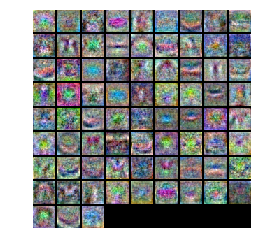

In [154]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [155]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.525


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

$\color{blue}{\textit Your Answer:}$ 1

$\color{blue}{\textit Your Explanation:}$ Adding more data would definitely help increase the accuracy of our model when applied to a training set. One way to improve accuracy without getting new data would be augment existing training data. We have already seen that increasing the size of the hidden layer or the regularization strength doesn't improve model performance by much.

